# Sentiment Analysis Python Package Frenzy: NLTK Default versus Vader
<b> IST 736 - Text Mining - Homework 1 <br>
<b> Emilio Ramos Monzalvo - eramosmo@syr.edu - 10/11/2021

## Introduction

### Problem Statement

Artificial Intelligence (AI) is an extraordinary field that can do wonders to society by making it easier for a population to be understood through Social Media, but it can also cause harm as shown in the 2016 United States Presidential Election where a candidate used it to target individuals with propaganda. People who are not familiar with it and its applications can have a misunderstood perception on its applications and capabilities as Hollywood has created films where an AI algorithm can take over the world. Most recently, the Looney Toons cartoon with Basketball Star Lebron James, showed an algorithm learning how to play basketball in order to beat Lebron. Realistic or far fetched, the attitude of a population towards AI can help determine what its focus can be in the future. In order to find the population's opinion, the study uses Social Media platforms, mainly Twitter, to get recent comments about the topic of AI.

It is a common problem in Text Mining is trying to identify a sentiment on a particular subject. This area is known as Sentiment Analysis which has become quite popular due to its large set of applications. Some applications include understanding customer reviews or even analyzing the population sentiment to COVID-19. Consequently, there are a multitude of approaches and tools one can use to complete a Sentiment Analysis problem statement like this one. 

In Python, one of the most popular Data Science programming languages, there is one packages called Natural Language Toolkit (NLTK) that contains more than one built-in tool for Sentiment Analysis. NLTK's default Sentiment Analysis tool and the Valence Aware Dictionary and sEntiment Reasoner (VADER) are two packages that were put up to the test in order to check its compability with finding the sentiment of AI in social media. In this study, the two tools will be put to the test and be evaluated based on their effectiveness in this problem.

## Analysis and Models

### About the Data

<b> Source: https://developer.twitter.com/en/docs/twitter-api/tools-and-libraries </b>

The data was pulled using the free API provided by Twitter where one can write a query to match tweets to a specific topic of choice. The API allows for one to set a time limit that checks what time range to pull the data from. Unfortunately, the API only allows for a maximum of 2000 tweets to be pulled per day, but it will still lead to an insight of the populations feelings towards AI.

The query fed into the API was restricted to the English Language and a date no longer than 30 days from today, October 11th, 2021. The query is looking for any tweet that contains the characters AI separated by a space or end of tweet and/or start of tweet. The only field kept from the search was the text field from the tweet. No other field like user, location, favorite, or retweet was considered in order to simplify the analysis to only text data. The location, or geo-code, was not included in the query since it is not the analysis is not limited to a certain population.

In [41]:
%load_ext autotime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import json
import tweepy

import warnings
warnings.filterwarnings("ignore")

path = 'C:\\Users\\ramos\\OneDrive\\Documents\\SyracuseUniversity\\9th_Quarter\\IST736\\Week01\\'

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


In [37]:
tweets_f = glob.glob(path + '\\SentimentHW1\\tweets3.csv')

if len(tweets_f) == 0:
    
    f_twitter_cred = open('twitter.json')
    twitter_cred = json.load(f_twitter_cred)

    auth = tweepy.OAuthHandler(twitter_cred['api_key'], twitter_cred['api_secret_key'])
    auth.set_access_token(twitter_cred['access_token'], twitter_cred['access_token_secret'])

    api = tweepy.API(auth)

    max_tweets = 2000
    since_time = np.datetime64('today') - np.timedelta64(30, 'D')
    
    warnings.filterwarnings("ignore")
    
    searched_tweets = tweepy.Cursor(api.search_tweets, q='%AI%', lang="en", since=since_time, include_entities=False).items(max_tweets)

    tweets = []
    for tweet in searched_tweets:
        tweets.append(tweet.text)
    
    df = pd.DataFrame(tweets, columns=['tweet']) # Convert to Data Frame
    df.to_csv(path + '\\SentimentHW1\\tweets.csv', index=False) # Save to CSV File
    
    print('Read in {} New Tweets.'.format(len(tweets)))
    
else:
    
    df = pd.read_csv(tweets_f[0]) # Read In Existing File
    
    print('Read in {} Existing Tweets.'.format(len(df)))

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

Read in 2000 New Tweets.


### Character and Word Count per Tweet 

The tweets were analyzed by checked for the number of characters and words per tweet. This is done to prevent tweets that only contain the word AI or very minimal characters that are not able to be checked for polarity. As seen below, the character count and word count are able to help us pick a limit as to which tweets should be excluded. An appropriate limit can be set by excluding tweets with less than 25 characters and less than 5 words.

In [49]:
df['char_count'] = df['tweet'].apply(len)
df['word_count']  = df['tweet'].str.split(' ').apply(len)

In [55]:
char_min = 25
word_min = 5

Text(0.5, 1.0, 'Word Count per Tweet')

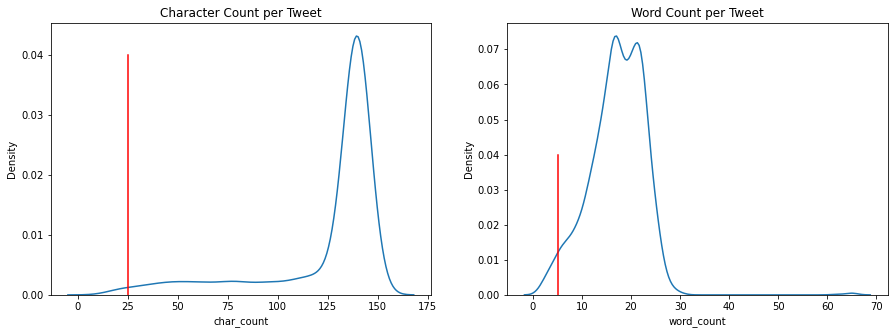

In [56]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
ax = sns.kdeplot(data=df, x='char_count')
ax.plot([char_min, char_min], [0, .04], color='red')
plt.title('Character Count per Tweet')
plt.subplot(122)
ax = sns.kdeplot(data=df, x='word_count')
ax.plot([word_min, word_min], [0, .04], color='red')
plt.title('Word Count per Tweet')

In [57]:
df = df.loc[((df['word_count'] > word_min) & (df['char_count'] > char_min))].reset_index(drop=True)
print('Number of Tweets left: ', len(df))

Number of Tweets left:  1933


### Sentiment Analysis

The Sentiment Analysis was performed on the remaining 1933 tweets after the minimum character and word count was taken into account. Due to the nature of the tweets, the Default Sentiment Analysis tool is not compatible with the problem statement as it can only be used in a supervised manner. In other words, it needs a label in order to help train and model that can be used to predict the sentiment of new tweets. On the other hand, VADER is an unsupervised algorithm that allows us to extract a polarity score from each tweet using a pre-trained model.

#### Vader

In [75]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
vader_res_pos = []
vader_res_neg = []
vader_res_neu = []
vader_res_comp = []
for sentence in df['tweet']:
    ss = sid.polarity_scores(sentence)
    vader_res_neg.append(ss['neg'])
    vader_res_pos.append(ss['pos'])
    vader_res_neu.append(ss['neu'])
    vader_res_comp.append(ss['compound'])
    
df['vader_neg'] = vader_res_neg
df['vader_pos'] = vader_res_pos
df['vader_neu'] = vader_res_neu
df['vader_comp'] = vader_res_comp
df['vader_res'] = ['pos' if 0 == np.argmax([x,y,z]) else 'neg' if 1 == np.argmax([x,y,z]) else 'neu' for x,y,z in df[['vader_pos', 'vader_neg', 'vader_neu']].values]

neu    1915
pos      14
neg       4
Name: vader_res, dtype: int64

#### NLTK Default

In order to still check the ease of use of the NLTK Default Sentiment Analysis tool, the label provided by VADER was used to label the tweets. It is important to note that this was done merely as an exercise to understand the NLTK's default Sentiment Analysis tool way of working with labeled data. In practice, there should have been a pre-labeled dataset revised and agreed upon used to train the model and test on the new tweets to see how they feel about AI.

Since VADER returns a compound value from -1 to 1 where 1 represents a positive tweet and -1 represents a very negative tweet, the tweets were labeled using a limit of 0 where -1 to 0 means it is a negative tweet while 0 to 1 means it is a positive tweet. If the tweets were to be broken up into negative, neutral and positive, the dataset would mostly consist of neutral tweets, so a neutral label was excluded. Once this was done, the 1933 tweets were broken up into 1654 negative tweets and 279 positive tweets. The tweets were then separated into a training and testing set in order to train the Supervised Sentiment Analysis model and to later test the accuracy of the model on data it has not encountered previously. Both the training and testing data is then tokenized and formatted into a NLTK-friendly format to input into a Naive Bayes Classifier. 

##### Labeling Tweets

In [100]:
df['vader_label'] = ['pos' if x>=0 else 'neg'for x in df['vader_comp'].values]
df['vader_label'].value_counts()

pos    1654
neg     279
Name: vader_label, dtype: int64

##### Tokenization

In [101]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
df['tweet_tokenized'] = [tt.tokenize(tweet.lower()) for tweet in df.tweet.values]
df['tweet_tokenized'].sample(10)

1256    [rt, @gupshup, :, drive, user, engagement, wit...
288     [rt, @gp_pulipaka, :, getting, back, to, gym, ...
1610    [rt, @plasmaposting, :, man, makes, some, beau...
256              [@stcardigan, vem, ai, 20m, de, streams]
795     [rt, @milocamj, :, china, beats, us, in, artif...
5       [rt, @debashis_dutta, :, 🙄, #digital, humans, ...
311     [rt, @ipfconline1, :, what's, new, in, #python...
1883    [rt, @2018iptv, :, top, 18, low-code, and, no-...
702     [rt, @stanleyepstein, :, “, top, reads, of, th...
189     [@cryptojaipur, @qntmami, @vectorspace_ai, @co...
Name: tweet_tokenized, dtype: object

##### Test Train Split

In [102]:
train = df.groupby(['vader_label']).sample(frac=.8)
trainL = [(x,y) for x,y in train[['tweet_tokenized', 'vader_label']].values]
train['vader_label'].value_counts()

pos    1323
neg     223
Name: vader_label, dtype: int64

In [103]:
test = df.loc[~df.index.isin(train.index.values)]
testL = [(x,y) for x,y in test[['tweet_tokenized', 'vader_label']].values]
test['vader_label'].value_counts()

pos    331
neg     56
Name: vader_label, dtype: int64

##### Sentiment Features

In [104]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in trainL])

unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

training_set = sentim_analyzer.apply_features(trainL)
testing_set = sentim_analyzer.apply_features(testL, labeled=None)

##### Training of Naive Bayes Classifier

In [105]:
from nltk.classify import NaiveBayesClassifier

trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)

Training classifier


## Results

### VADER Results

In order to interpret the results of the VADER Sentiment Analysis, the result of the model was plotted by its compound score. The distribution of the plot shows how most of the tweets are centered around 0 rather than any of the extreme polarity scores. This could mean that the tweets are merely stating facts rather than expressing an opinion on the subject. The quantiles of the compound score also return similar results where more than 25% of the tweets appear to have gotten a polarity compound score of 0 with the mean being 0.19. This means that most of the tweets were leaning closer to being positive, but the distribution still shows too many of them were still closer to being a neutral tweet rather than a polarized tweet.

In [117]:
vader_res = pd.concat([df['vader_res'].value_counts(normalize=True), df['vader_res'].value_counts()], axis=1)
vader_res.columns = ['VADER_percent', 'VADER_count']
vader_res

,VADER_percent,VADER_count
neu,0.990688,1915
pos,0.007243,14
neg,0.002069,4


In [107]:
df[['vader_comp']].describe()

,vader_comp
count,1933.000000
mean,0.188679
std,0.382682
min,-0.943800
25%,0.000000
50%,0.000000
75%,0.484000
max,0.960100


<AxesSubplot:xlabel='vader_comp', ylabel='Density'>

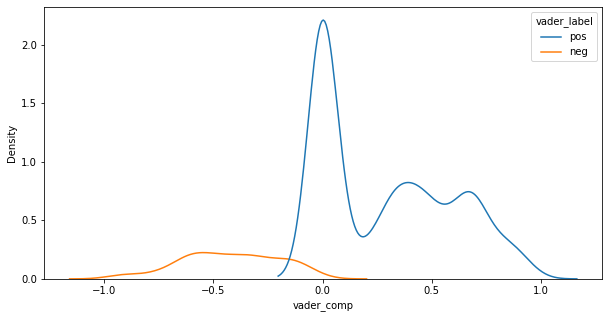

In [109]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='vader_comp', hue='vader_label')

### NLTK Default

NLTK's Default Sentiment Analysis tool resulted in a high accuracy of about 74%, but a low precision score of 29% for the negatively labeled tweets. Even if the use of this tool was not to extract the polarity of the tweets, the results also show how separable the tweets are based on the polarity predicted by VADER. This means that if the polarity predicted by VADER is correct, then the NLTK Default Sentiment Analysis tool will be able to separate positive and negative tweets well. In reality, the results show promise since the positive tweets are being correctly labeled in the test set with a precision score of 90%, but it is more likely that the model is biased towards positive tweets since there is more of them. This is also supported by the training set results since it shows a similar story as the testing results where the positive labeled tweets appear to have a better predictability compared to negative ones. Consequently, it indicates that the high quantity of neutral or non-polarized tweets prevents the model to correctly predict negative tweets about AI. 

In [123]:
nltk_res = pd.DataFrame([])

for key,value in sorted(sentim_analyzer.evaluate(training_set).items()):
    # print('{}: {}'.format(key, value))
    nltk_res.loc[key, 'train'] = value
for key,value in sorted(sentim_analyzer.evaluate(testing_set).items()):
    # print('{}: {}'.format(key, value))
    nltk_res.loc[key, 'test'] = value
    
nltk_res

Evaluating NaiveBayesClassifier results...
Evaluating NaiveBayesClassifier results...


,train,test
Accuracy,0.847348,0.746770
F-measure [neg],0.613115,0.371795
F-measure [pos],0.904915,0.841424
Precision [neg],0.483204,0.290000
Precision [pos],0.968939,0.905923
Recall [neg],0.838565,0.517857
Recall [pos],0.848828,0.785498


In [119]:
# List of only feature dictionary from the featureset list of tuples 
feature_list = [f[0] for f in testing_set]

# Looping over each to classify each review
test.loc[test.index.values,'nltk_default_res'] = [classifier.classify(features) for features in feature_list]
test.loc[test.index.values,'nltk_default_correct'] = test['nltk_default_res'] == test['vader_label']
test['nltk_default_correct'].value_counts()

True     289
False     98
Name: nltk_default_correct, dtype: int64

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test['vader_label'], test['nltk_default_res'])

array([[ 29,  27],
       [ 71, 260]], dtype=int64)

#### Incorrectly Labeled Tweets

By taking a look at the mis-classified tweets in the testing set, there is a conflicting result where the compound scores reflect a normal distribution centered at 0 with equal tails on both sides. The most surprising aspect is that some of the extremely polar tweets are predicted incorrectly by NLTK's Default Sentiment Analyzer. The results are indicative that these tweets might have been incorrectly labeled by the VADER algorithm.

In [124]:
test.loc[test['nltk_default_correct'] == False]['vader_label'].value_counts()

pos    71
neg    27
Name: vader_label, dtype: int64

<AxesSubplot:xlabel='vader_comp', ylabel='Density'>

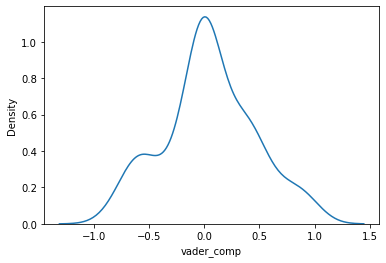

In [122]:
plt.figure()
sns.kdeplot(data=test.loc[test['nltk_default_correct'] == False], x='vader_comp')

In [120]:
test.loc[test['nltk_default_correct'] == False][['tweet', 'vader_comp', 'vader_label', 'nltk_default_res']].head(10)

,tweet,vader_comp,vader_label,nltk_default_res
51,"@leannewhelan8 Stats are rubbish imo lol, but ...",0.2263,pos,neg
71,Starting to remember now... How did we as a sp...,0.0000,pos,neg
75,@strongforu @DanPriceSeattle Robots still requ...,0.0000,pos,neg
76,AI Content Generator With A Lifetime Deal (LTD...,0.0000,pos,neg
95,@ai_xyenn @neuroticphys All of their voices th...,0.5719,pos,neg
127,"He's being, The Gringo, USA is in an AI Movie ...",-0.5994,neg,pos
128,@LowlyLyricist @pixelvault_ Burned my only com...,0.0000,pos,neg
143,Creations reflect the heart of the creator ㅡ A...,0.3818,pos,neg
161,@keenanrox @_Nkazi_mulo The replies to that tw...,-0.1779,neg,pos
163,@mizar_ai From my analysis and the project roa...,0.4019,pos,neg


## Conclusions

While VADER is more compatible with a tweet Sentiment Analysis, the tool only returned 18 out of 1933 tweets to be polarizing enough. This means that almost all of the tweets use AI in a form that does not provide an opinion on the subject. It might be that 1915 of the tweets are merely stating a fact. Then due to the plug-and-chug nature of VADER, the results are to be trusted without any optimization done on the model. This makes it difficult to tweak the model into providing better results based on the dataset available. In other words, if the subject in question was AI, then the model will not take that into consideration before making a decision, so words related to AI might not be highlighted as more important than others.

The NLTK's Sentiment Analyzer turned out to be less compatible with the problem statement at hand, but it turned useful when evaluating the VADER polarization results. The pre-processing of the tweets prior to model fitting shows a higher adaptability and modularity which makes it better if there was a need to tweak to optimize the model. In contrast, VADER is simpler for beginners to use since the pre-processing is done for them. Nonetheless, a Data Scientist prefers Supervised Models when there is a choice against Unsupervised Models; therefore, NLTK's default is more likely to get a greater precision and accuracy result if there is a pre-labeled dataset.

While the two tools used have their benefits, VADER turned to be the only tool that returned some idea of the current sentiment on Artificial Intelligence even if the results were inconclusive in the experiment. For future experiments and more conclusive results, the study showed how the limited sampling provided by the Twitter API might not be preferable for Sentiment Analysis on whole populations. In addition, the VADER tool might be suited better as a first line of defense when manually labeling tweets rather than to get the general sentiment of a whole population on a particular subject.